In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
# read prices from csv file
# prices = pd.read_csv('finaldata.csv')
# prices
# prices = prices.apply(pd.to_numeric, errors='coerce')
# prices = prices.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.name != 'timestamp' else col)
# prices = pd.read_csv('finaldata.csv', parse_dates=['Timestamp'], index_col='Timestamp')
# prices = prices.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.name != 'Timestamp' else col)

# prices = pd.read_csv('finaldata.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# prices = prices.apply(lambda col: col.abs() if col.name != 'Timestamp' else col)

prices = pd.read_csv('finaldata.csv', parse_dates=['Timestamp'], index_col='Timestamp')

prices = prices.apply(lambda col: col.abs() if col.name != 'Timestamp' else col)






In [26]:
!pip install hurst
from hurst import compute_Hc

In [15]:
prices

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr14,Instr15,Instr16,Instr17,Instr18,Instr19,Instr20
Timestamp,,,,,,,,,,,,,,,,,,,,
2016-03-11,1.416659,1.420558,1.426727,1.426903,1.424853,1.421595,1.414042,1.403588,1.393133,1.382952,1.372094,1.360408,1.351622,1.343384,1.333519,1.325976,1.319087,1.313109,1.309208,1.306107
2016-03-14,1.462301,1.472009,1.482483,1.486425,1.485694,1.483600,1.477712,1.468183,1.459244,1.449825,1.439647,1.429297,1.421079,1.414141,1.405593,1.398603,1.393041,1.387593,1.384227,1.381651
2016-03-15,1.504228,1.514607,1.527892,1.535233,1.535472,1.533584,1.527089,1.517461,1.508316,1.499284,1.488712,1.477881,1.469107,1.461563,1.452365,1.444678,1.438367,1.432122,1.427919,1.425299
2016-03-16,1.419844,1.426643,1.440522,1.448331,1.447591,1.444372,1.437431,1.428227,1.419032,1.410119,1.399115,1.387963,1.378961,1.370482,1.361888,1.354871,1.348509,1.342255,1.338886,1.336325
2016-03-17,1.355626,1.360255,1.373846,1.382261,1.383064,1.381734,1.377009,1.370292,1.363145,1.355088,1.345784,1.335752,1.327977,1.320802,1.312817,1.306453,1.301592,1.296917,1.294369,1.292677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,0.835726,0.779651,0.811547,0.839093,0.864957,0.887792,0.908630,0.926472,0.941884,0.955530,0.966677,0.975294,0.981823,0.989337,0.998928,1.007441,1.015631,1.022611,1.028738,1.034918
2023-12-01,0.626091,0.664025,0.698311,0.730168,0.758640,0.782129,0.802080,0.818593,0.833516,0.846164,0.856458,0.865071,0.871727,0.881696,0.890817,0.898892,0.907484,0.914124,0.920744,0.929995
2023-12-04,0.580980,0.625299,0.666123,0.703383,0.737745,0.766944,0.791685,0.813265,0.831472,0.846861,0.859302,0.869422,0.879116,0.890729,0.900785,0.910606,0.919412,0.927077,0.934759,0.945104


In [16]:
cumret = np.log(prices).diff().cumsum()+1 # calculate cumulative returns
cumret.dropna(inplace=True)

In [17]:
def calculate_distances(cumret):
    '''
    calculate Euclidean distance for each pair of stocks in the dataframe
    return sorted dictionary (in ascending order)
    '''
    distances = {} # dictionary with distance for each pair

    # calculate distances
    for s1 in cumret.columns:
        for s2 in cumret.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in distances.keys()) and (f'{s2}-{s1}' not in distances.keys()):
                dist = np.sqrt(np.sum((cumret[s1] - cumret[s2])**2)) # Euclidean distance
                distances[f'{s1}-{s2}'] = dist

    # sort dictionary
    sorted_distances = {k:v for k,v in sorted(distances.items(), key = lambda item: item[1])}

    return sorted_distances

def parse_pair(pair):
    '''
    parse pair string S1-S2
    return tickers S1, S2
    '''
    dp = pair.find('-')
    s1 = pair[:dp]
    s2 = pair[dp+1:]

    return s1,s2

def cadf_pvalue(s1, s2, cumret):
    '''
    perform CADF cointegration tests
    since it is sensitive to the order of stocks in the pair, perform both tests (s1-2 and s2-s1)
    return the smallest p-value of two tests
    '''
    from statsmodels.tsa.stattools import coint

    p1 = coint(cumret[s1], cumret[s2])[1]
    p2 = coint(cumret[s2], cumret[s1])[1]

    return min(p1,p2)

def calculate_halflife(spread):
    '''
    calculate half-life of mean reversion of the spread
    '''
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant

    ylag = spread.shift()
    deltay = spread - ylag
    ylag.dropna(inplace=True)
    deltay.dropna(inplace=True)

    res = OLS(deltay, add_constant(ylag)).fit()
    halflife = -np.log(2)/res.params[0]

    return halflife

def calculate_metrics(sorted_distances, cumret, N=5):
    '''
    calculate metrics for N pairs with the smallest Euclidean distance
    return dataframe of results
    '''
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller

    pairs = [k for k,v in sorted_distances.items()][:N]

    cols = ['Euclidean distance', 'CADF p-value', 'ADF p-value', 'Spread SD',
        'Num zero-crossings', 'Hurst Exponent', 'Half-life of mean reversion', '% days within 2-SD band']
    results = pd.DataFrame(index=pairs, columns=cols)

    for pair in pairs:
        s1,s2 = parse_pair(pair)
        spread = cumret[s1] - cumret[s2]
        results.loc[pair]['Euclidean distance'] = np.sqrt(np.sum((spread)**2))
        results.loc[pair]['CADF p-value'] = cadf_pvalue(s1, s2, cumret)
        results.loc[pair]['ADF p-value'] = adfuller(spread)[1]
        results.loc[pair]['Spread SD'] = spread.std()
        results.loc[pair]['Num zero-crossings'] = ((spread[1:].values * spread[:-1].values) < 0).sum()
        results.loc[pair]['Hurst Exponent'] = compute_Hc(spread)[0]
        results.loc[pair]['Half-life of mean reversion'] = calculate_halflife(spread)
        results.loc[pair]['% days within 2-SD band'] = (abs(spread) < 2*spread.std()).sum() / len(spread) * 100

    return results

def plot_pairs(sorted_distances, cumret_train, cumret_test, N=5):
    '''
    plot cumulative returns of the spread for each of N pairs with smallest Euclidean distance
    '''
    pairs = [k for k,v in sorted_distances.items()][:N]

    for pair in pairs:
        s1,s2 = parse_pair(pair)
        spread_train = cumret_train[s1] - cumret_train[s2]
        spread_test = cumret_test[s1] - cumret_test[s2]
        spread_mean = spread_train.mean() # historical mean
        spread_std = spread_train.std() # historical standard deviation

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))
        fig.suptitle(f'Spread of {pair} pair', fontsize=16)
        ax1.plot(spread_train, label='spread')
        ax1.set_title('Formation period')
        ax1.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax1.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax1.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax1.legend()
        ax2.plot(spread_test, label='spread')
        ax2.set_title('Trading period')
        ax2.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax2.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax2.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax2.legend()

In [20]:
cumret60_12 = cumret.loc['2016-03-11':]
cumret60_12 = cumret60_12 / cumret60_12.iloc[0] # divide by first row so that all prices start at 1
train60_12 = cumret60_12.loc['2016-03-11':'2022-03-12'] # formation period
test60_12 = cumret60_12.loc['2022-03-13':'2022-09-13'] # trading period

In [21]:
cumret60_12
train60_12

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr14,Instr15,Instr16,Instr17,Instr18,Instr19,Instr20
Timestamp,,,,,,,,,,,,,,,,,,,,
2016-03-14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-03-15,1.027400,1.027548,1.029057,1.031040,1.031633,1.031779,1.031482,1.031592,1.031610,1.032032,1.031977,1.031854,1.031652,1.031374,1.031097,1.030772,1.030363,1.029935,1.029436,1.029446
2016-03-16,0.971441,0.969772,0.972348,0.975057,0.975062,0.974300,0.973528,0.973597,0.973295,0.973483,0.972751,0.972036,0.971350,0.970172,0.969993,0.969841,0.969191,0.968517,0.968454,0.968420
2016-03-17,0.926580,0.923757,0.926705,0.930200,0.931292,0.931780,0.932396,0.933970,0.934894,0.935471,0.935670,0.935499,0.935474,0.935051,0.935130,0.935293,0.935612,0.935953,0.936424,0.936980
2016-03-18,0.939397,0.936244,0.938718,0.942940,0.945265,0.946596,0.947639,0.949652,0.950534,0.951051,0.950676,0.950384,0.949674,0.948507,0.948354,0.947696,0.947128,0.946543,0.946625,0.946765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,1.689635,1.648939,1.610964,1.576736,1.549729,1.530769,1.522007,1.515970,1.511095,1.507917,1.508419,1.513633,1.517250,1.516142,1.518432,1.520286,1.520887,1.522663,1.523757,1.522693
2022-03-08,1.768695,1.730808,1.691459,1.652990,1.616125,1.585389,1.563579,1.549059,1.535619,1.524219,1.518051,1.515886,1.511769,1.505489,1.502383,1.498276,1.492978,1.488281,1.483315,1.475158
2022-03-09,1.454944,1.400004,1.348827,1.300329,1.261156,1.232193,1.209161,1.192238,1.177476,1.165326,1.160095,1.157776,1.155661,1.155066,1.159716,1.161500,1.161560,1.165111,1.168912,1.168633


In [22]:
sorted_distances60_12 = calculate_distances(train60_12)

In [23]:
[[k,v] for k,v in sorted_distances60_12.items()][:10]


[['Instr10-Instr11', 4.428818592056944],
 ['Instr11-Instr12', 4.739556721130585],
 ['Instr12-Instr13', 4.75507865766157],
 ['Instr13-Instr14', 5.04767623647675],
 ['Instr19-Instr20', 6.223294695791321],
 ['Instr11-Instr13', 6.507786767792724],
 ['Instr15-Instr16', 6.581056424275383],
 ['Instr14-Instr15', 6.645592751822678],
 ['Instr7-Instr8', 6.724864174115753],
 ['Instr13-Instr15', 6.753391069822317]]

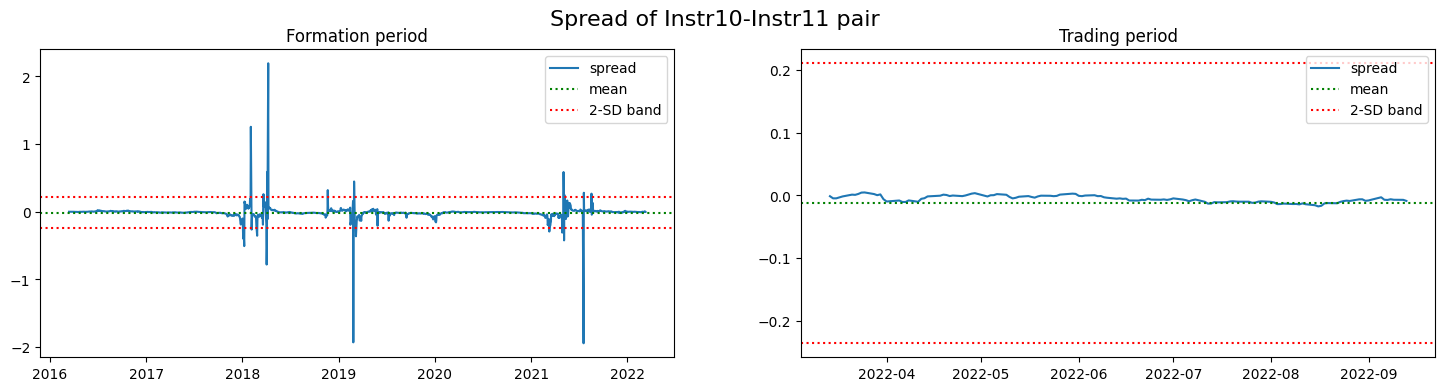

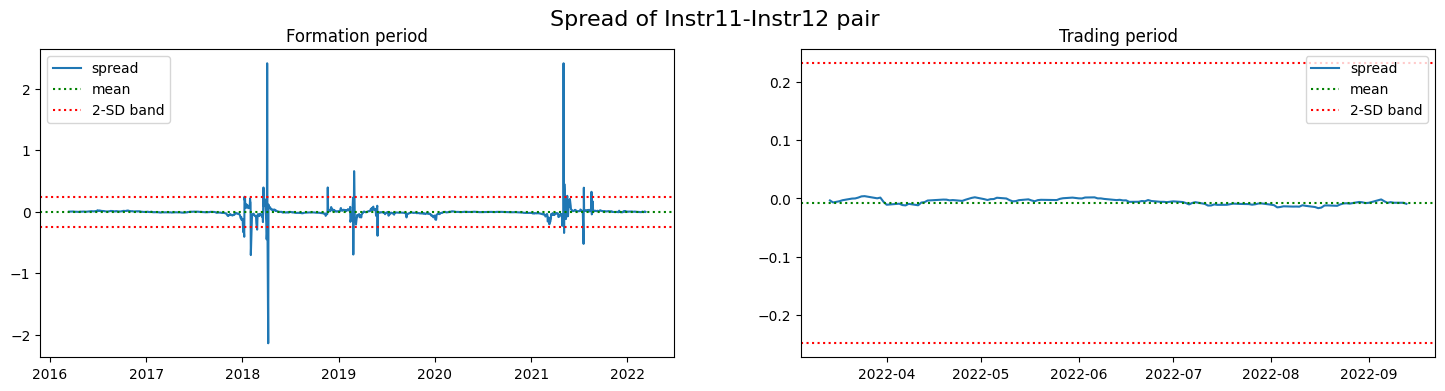

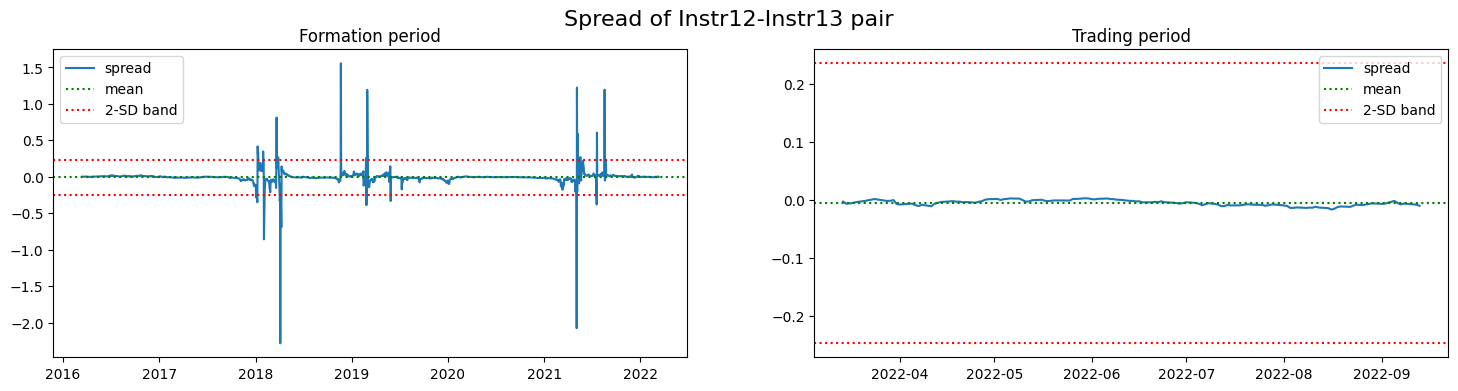

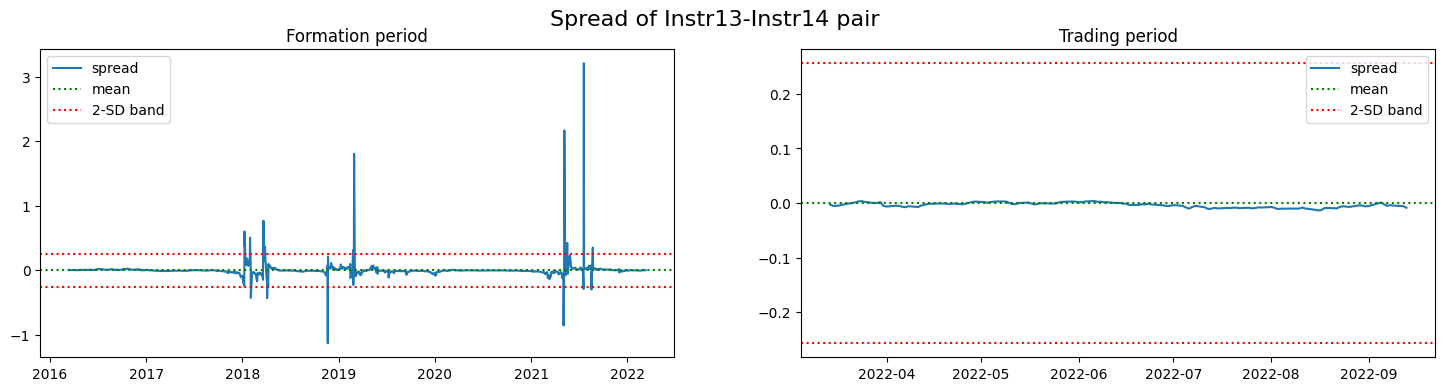

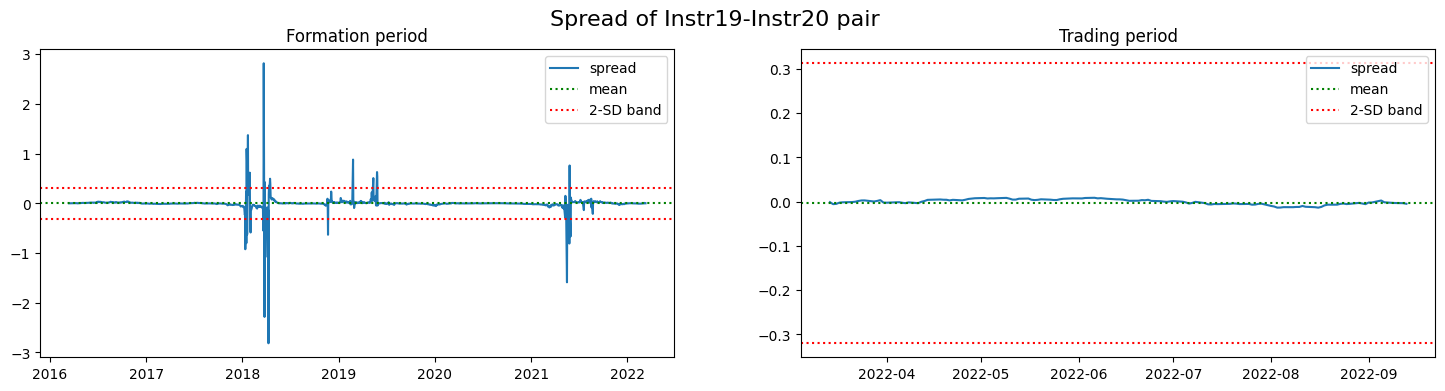

In [24]:
plot_pairs(sorted_distances60_12, train60_12, test60_12)


In [27]:
calculate_metrics(sorted_distances60_12, train60_12)

,Euclidean distance,CADF p-value,ADF p-value,Spread SD,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within 2-SD band
Instr10-Instr11,4.428819,0.0,0.0,0.111821,79,0.393337,0.736556,98.322581
Instr11-Instr12,4.739557,0.0,0.0,0.120118,63,0.396531,0.738737,98.516129
Instr12-Instr13,4.755079,0.0,0.0,0.120676,83,0.376638,0.703121,98.387097
Instr13-Instr14,5.047676,0.0,0.0,0.128251,63,0.383619,0.740341,98.516129
Instr19-Instr20,6.223295,0.0,0.0,0.158079,94,0.361942,0.600495,98.193548


In [29]:
cumret60_24 = cumret.loc['2016-07-01':]
cumret60_24 = cumret60_24 / cumret60_24.iloc[0] # divide by first row so that all prices start at 1
train60_24 = cumret60_24.loc['2016-07-01':'2021-06-30'] # formation period
test60_24= cumret60_24.loc['2021-07-01':'2022-07-30'] # trading period


In [30]:
# calculate Euclidean distances for each pair
sorted_distances60_24 = calculate_distances(train60_24)
# print top 10 pairs with smallest distance
[[k,v] for k,v in sorted_distances60_24.items()][:10]

[['Instr10-Instr11', 11.315580292335724],
 ['Instr12-Instr13', 14.008352861409515],
 ['Instr11-Instr12', 14.06281090624608],
 ['Instr13-Instr14', 14.376820796044976],
 ['Instr7-Instr8', 16.158220493689605],
 ['Instr3-Instr4', 16.85920767698116],
 ['Instr2-Instr3', 17.26812997097746],
 ['Instr9-Instr10', 17.652640008315498],
 ['Instr6-Instr7', 17.6557545527922],
 ['Instr8-Instr9', 18.426114060710173]]

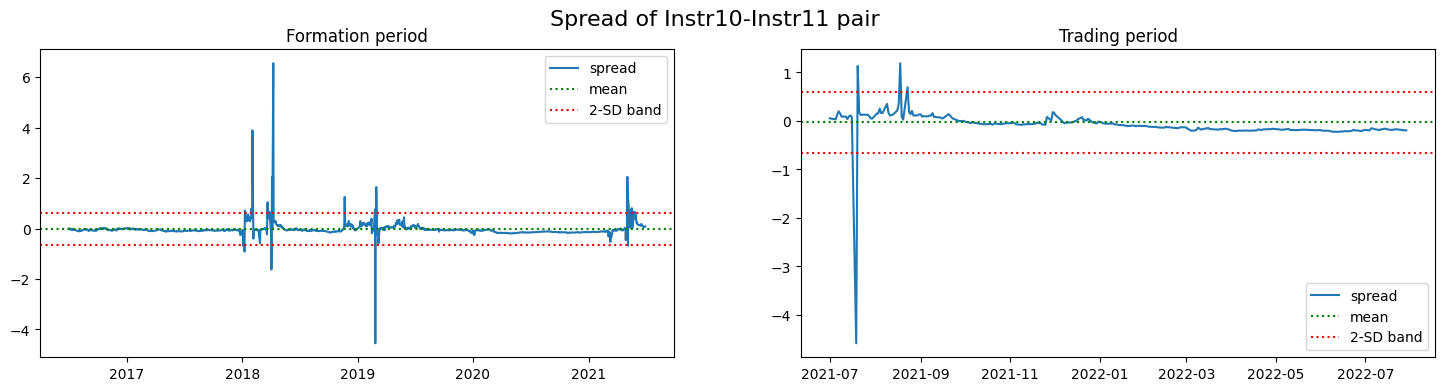

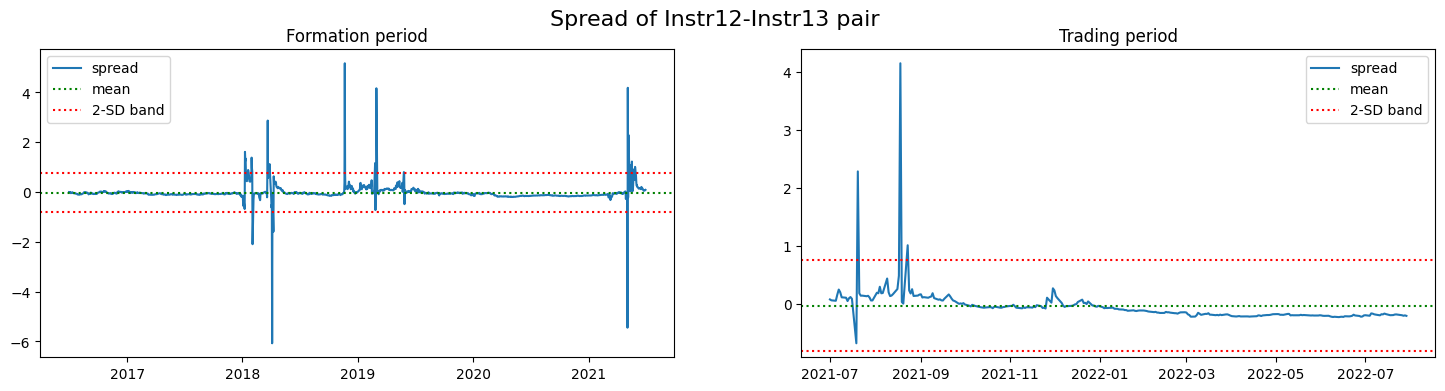

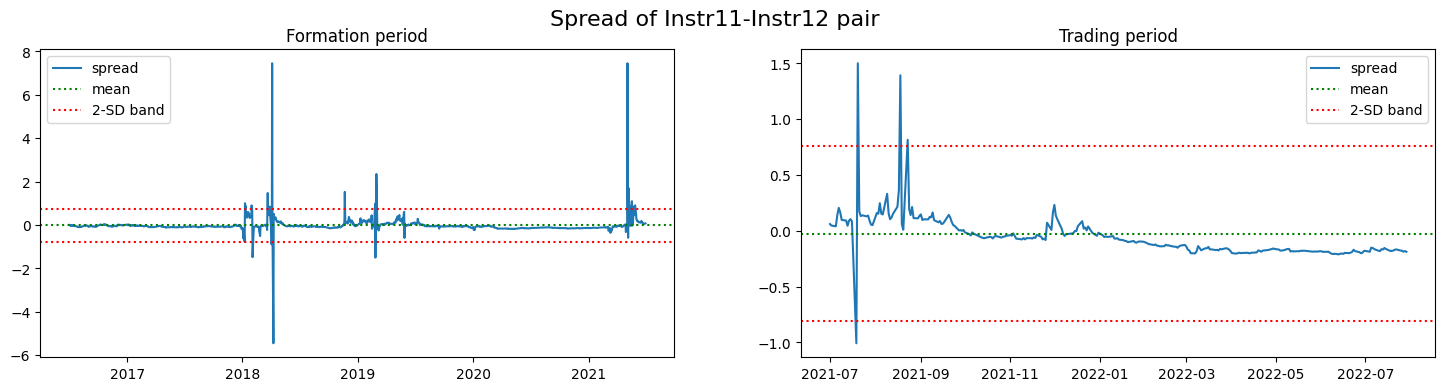

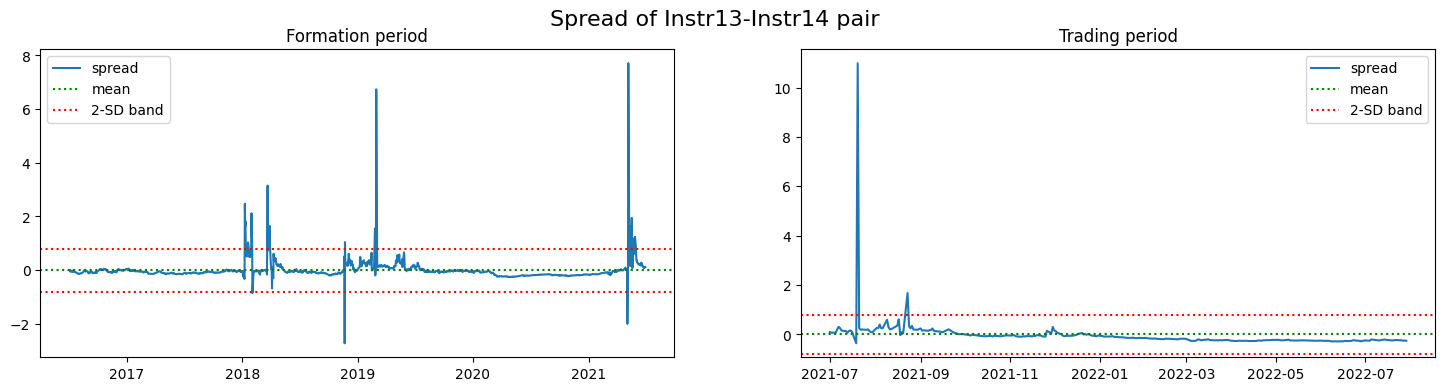

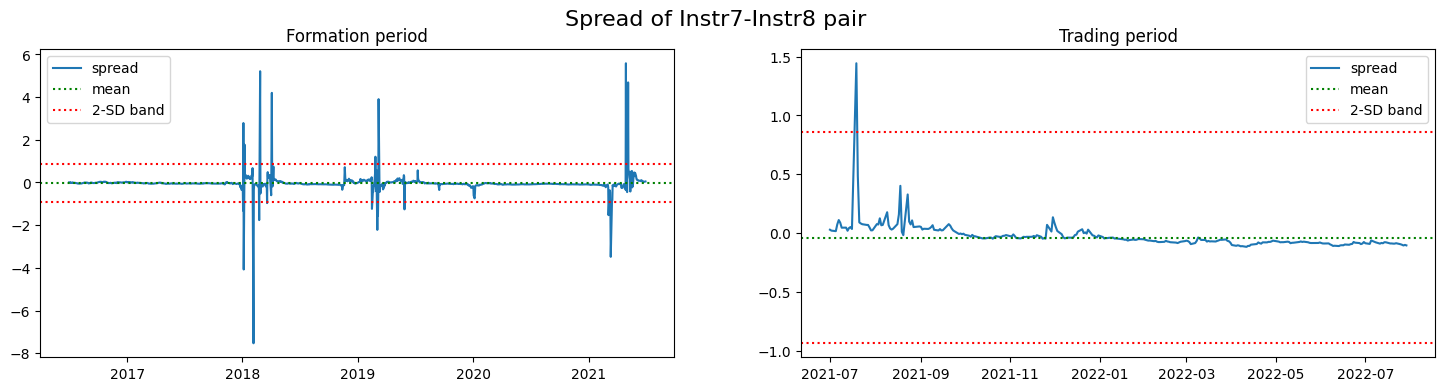

In [31]:
plot_pairs(sorted_distances60_24, train60_24, test60_24)


In [32]:
calculate_metrics(sorted_distances60_24, train60_24)


,Euclidean distance,CADF p-value,ADF p-value,Spread SD,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within 2-SD band
Instr10-Instr11,11.31558,0.0,0.0,0.313679,59,0.402603,0.847709,98.062016
Instr12-Instr13,14.008353,0.0,0.0,0.389571,59,0.383052,0.778734,97.984496
Instr11-Instr12,14.062811,0.0,0.0,0.39091,55,0.405742,0.820267,98.217054
Instr13-Instr14,14.376821,0.0,0.000082,0.400405,67,0.378341,1.046289,97.596899
Instr7-Instr8,16.15822,0.000005,0.0,0.448224,67,0.355722,0.696347,98.217054
